In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = r'/content/drive/My Drive/NCCU_Project'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(path + '/ETF_Raw.csv')
df['date']= pd.to_datetime(df['date'])
df=df.sort_values(['date','tic']).reset_index(drop=True)

df_close = df[['date', 'tic', 'close']] 
df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196461 entries, 0 to 1196460
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1196461 non-null  datetime64[ns]
 1   tic     1196461 non-null  object        
 2   close   1196461 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.4+ MB


In [3]:
#Closing Prices Dataframe
df_close = df_close.pivot_table(index = 'date', columns = 'tic', values='close').dropna(axis=1)
df_close.head()

tic,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
date,,,,,,,,,,,,,,,,,,,,,
2012-05-10,28.426323,10.93,89.070000,20.375713,36.580002,24.000000,29.853155,58.700001,31.920000,37.130001,...,113.250000,27.500000,82.839996,39.320000,20.131752,26.139999,51.301224,60.320389,37.639999,19.889999
2012-05-11,28.218884,11.32,88.419998,20.239643,36.619999,23.190001,29.766792,58.610001,32.200001,37.330002,...,112.900002,27.500000,83.099998,39.259998,20.105402,26.030001,51.545650,60.097088,37.540001,20.120001
2012-05-14,27.825464,11.24,82.339996,19.936428,36.650002,23.139999,29.594065,58.810001,32.230000,37.189999,...,108.089996,27.490000,82.120003,39.080002,20.263506,25.430000,50.186916,59.572815,36.889999,19.490000
2012-05-15,28.977110,11.13,81.080002,19.756071,36.400002,23.740000,29.694822,58.930000,32.330002,36.900002,...,106.449997,27.170000,81.790001,38.980000,19.499340,25.209999,50.150970,59.038834,37.070000,19.080000
2012-05-16,28.440628,11.13,82.099998,19.502857,36.700001,23.219999,30.011490,59.119999,32.360001,36.349998,...,105.059998,27.450001,82.169998,38.669998,18.945982,25.370001,50.424156,58.990292,37.099998,18.809999


In [4]:
#Calculation of the Log Returns
df_returns = (df_close.apply(lambda x: np.log(x) - np.log(x.shift(1)))).iloc[1:]
df_returns.head() 

tic,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
date,,,,,,,,,,,,,,,,,,,,,
2012-05-11,-0.007324,0.035060,-0.007324,-0.006700,0.001093,-0.034333,-0.002897,-0.001534,0.008734,0.005372,...,-0.003095,0.000000,0.003134,-0.001527,-0.001310,-0.004217,0.004753,-0.003709,-0.002660,0.011497
2012-05-14,-0.014040,-0.007092,-0.071241,-0.015095,0.000819,-0.002158,-0.005820,0.003407,0.000931,-0.003757,...,-0.043538,-0.000364,-0.011863,-0.004595,0.007833,-0.023320,-0.026713,-0.008762,-0.017467,-0.031813
2012-05-15,0.040555,-0.009835,-0.015421,-0.009088,-0.006845,0.025599,0.003399,0.002038,0.003098,-0.007828,...,-0.015289,-0.011709,-0.004027,-0.002562,-0.038441,-0.008689,-0.000716,-0.009004,0.004868,-0.021261
2012-05-16,-0.018688,0.000000,0.012502,-0.012900,0.008208,-0.022147,0.010608,0.003219,0.000927,-0.015017,...,-0.013144,0.010253,0.004635,-0.007985,-0.028789,0.006327,0.005432,-0.000823,0.000809,-0.014252
2012-05-17,-0.003275,-0.088237,-0.185933,-0.029662,-0.007110,-0.003019,-0.005129,-0.012425,-0.010875,-0.018604,...,-0.034079,-0.007313,-0.003169,-0.020377,0.011065,-0.038165,-0.030692,-0.020955,-0.012203,-0.020409


In [5]:
#Calculation of Moving Average for Stock Price
def dailyMovingAverage(df_close, moving_avg_period):
  dates = df_close.index[moving_avg_period:] #Storing dates of the required dates
  stocks = df_close.columns #Storing stock names
  moving_avg = []
  
  for i in range(df_close.shape[0]-moving_avg_period):
    mean = df_close.iloc[i:i+moving_avg_period,:].mean()
    moving_avg.append(mean)

  return pd.DataFrame(data = moving_avg, index = dates, columns = stocks)

In [6]:
movingAverage = dailyMovingAverage(df_close, 252)

In [7]:
movingAverage.head()

tic,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
date,,,,,,,,,,,,,,,,,,,,,
2013-05-14,28.639298,13.163214,74.168254,19.547898,42.881349,18.331508,32.582685,67.515238,35.868571,41.018571,...,112.991667,28.263849,87.825714,39.267143,19.921890,26.022778,48.276962,65.517568,39.340318,21.384603
2013-05-15,28.651305,13.191667,74.156548,19.529948,42.954286,18.328135,32.611244,67.601944,35.916667,41.055119,...,113.106310,28.273889,87.858532,39.280952,19.935274,26.031389,48.273510,65.589844,39.375873,21.413056
2013-05-16,28.668989,13.221389,74.148532,19.510410,43.027262,18.328254,32.642567,67.689841,35.967738,41.092262,...,113.212897,28.285119,87.890833,39.293929,19.949599,26.041587,48.268432,65.663392,39.411389,21.440238
2013-05-17,28.686275,13.252659,74.160754,19.492887,43.097698,18.328135,32.671281,67.776349,36.016667,41.129206,...,113.336984,28.295635,87.924881,39.306230,19.960788,26.054325,48.267918,65.737594,39.448214,21.469444
2013-05-20,28.700610,13.283929,74.180913,19.475893,43.171468,18.326508,32.698642,67.868849,36.065397,41.169365,...,113.474048,28.308532,87.964444,39.319325,19.975636,26.069087,48.269060,65.812837,39.484484,21.502421


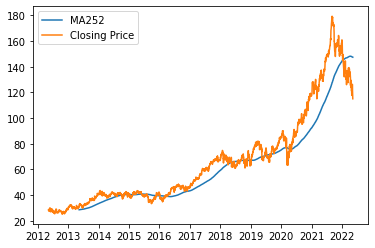

In [8]:
plt.plot(movingAverage.iloc[:,0], label = 'MA252')
plt.plot(df_close.iloc[:,0], label = 'Closing Price')
plt.legend()
plt.show()

In [9]:
## Exporting the Dataset
from google.colab import drive
drive.mount('drive')

movingAverage.to_csv(path + '/MovingAverage.csv')
#!cp MovingAverage.csv "drive/My Drive/Machine Learning Project/ML Section Exports"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [10]:
df.head()

,date,open,high,low,close,adjcp,volume,tic,day
0,2012-05-10,29.048641,29.256081,28.383406,28.426323,25.962908,3291731.0,A,3
1,2012-05-10,10.920000,11.000000,10.720000,10.930000,10.304163,5759600.0,AAL,3
2,2012-05-10,88.910004,89.830002,88.430000,89.070000,85.069107,718000.0,AAP,3
3,2012-05-10,20.520714,20.567142,20.301430,20.375713,17.421598,333200000.0,AAPL,3
4,2012-05-10,36.360001,37.119999,36.279999,36.580002,31.186235,4883100.0,ABC,3


# Linear Regression

### PCA

First, we perform PCA on our full features dataset to feed into our linear regression. 

In [11]:
#Dataset we are compressing, column level 0 = Stock, column level 1 = feature
raw_df = df.drop(columns = ['close']).set_index(['date' , 'tic']).unstack(level = 1).stack(level = 0).unstack()
raw_df = raw_df.dropna(axis = 1)
raw_df.head()

tic                 A                                                   \
                adjcp  day       high        low       open     volume   
date                                                                     
2012-05-10  25.962908  3.0  29.256081  28.383406  29.048641  3291731.0   
2012-05-11  25.773438  4.0  28.819742  28.183119  28.276110  5398796.0   
2012-05-14  25.414118  0.0  28.211731  27.496424  27.804007  5526574.0   
2012-05-15  26.465963  1.0  29.735336  28.905579  29.263233  9783064.0   
2012-05-16  25.975971  2.0  29.327612  28.397711  29.091558  4976321.0   

tic               AAL                     ...       ZBRA             \
                adjcp  day   high    low  ...       high        low   
date                                      ...                         
2012-05-10  10.304163  3.0  11.00  10.72  ...  37.950001  37.520000   
2012-05-11  10.671832  4.0  11.47  10.81  ...  37.919998  37.380001   
2012-05-14  10.596414  0.0  11.73  11.24  ...  37.200001  36.730000   
2012-05-15  10.492714  1.0  11.30  10.90  ...  37.380001  36.400002   
2012-05-16  10.492714  2.0  11.59  11.12  ...  37.680000  37.020000   

tic                                   ZION                             \
                 open    volume      adjcp  day       high        low   
date                                                                    
2012-05-10  37.900002  123000.0  17.049673  3.0  20.219999  19.840000   
2012-05-11  37.380001   56900.0  17.246830  4.0  20.170000  19.440001   
2012-05-14  37.160000  120200.0  16.706791  0.0  20.010000  19.440001   
2012-05-15  36.970001  169000.0  16.355339  1.0  19.620001  18.969999   
2012-05-16  37.130001  211800.0  16.123896  2.0  19.389999  18.809999   

tic                               
                 open     volume  
date                              
2012-05-10  20.000000  1600000.0  
2012-05-11  19.780001  2438800.0  
2012-05-14  19.760000  2912100.0  
2012-05-15  19.480000  3290200.0  
2012-05-16  19.170000  2219300.0  

[5 rows x 2676 columns]

In [12]:
raw_df = raw_df.to_numpy()
raw_df.shape

(2516, 2676)

How many principal components to keep?

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#Scaling the data
raw_df_scaled = MinMaxScaler().fit_transform(raw_df)

#Performing PCA ~ Reducing Dimensionality 382
PCA = PCA(n_components=382)
PCA_df = PCA.fit_transform(raw_df_scaled)

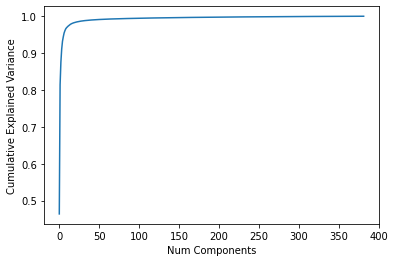

In [14]:
plt.plot(np.cumsum(PCA.explained_variance_ratio_))
plt.xlabel('Num Components')
plt.ylabel('Cumulative Explained Variance');

Storing the stock names, and dates

In [15]:
dates = df_close.index
stocks = df_close.columns
PC_labs = []
for i in range(PCA_df.shape[1]):
  lab = "PC" + str(i+1)
  PC_labs.append(lab)

### Linear Regression Prediction Functions

In [16]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

#Using the full features dataset, the closing prices; we are able to fit a line over a specified time period
def predict_prices(raw_df, close, time, lookback, forward, stock_num):
  
  #PCA
  pca1 = PCA(n_components = 10)
  pca2 = PCA(n_components = 10)


  #Training data = t - forward - lookback
  X_train = raw_df[time-forward-lookback:time-forward,:]
  X_train = MinMaxScaler().fit_transform(X_train)
  X_train = pca1.fit_transform(X_train)
  y_train = close.iloc[time-forward+1:time+1,stock_num]

  #Testing = t - lookback
  X_test = raw_df[time-lookback:time,:]
  X_test = MinMaxScaler().fit_transform(X_test)
  X_test = pca2.fit_transform(X_test)
  y_test = close.iloc[time+1 : time+forward+1, stock_num]

  LR = LinearRegression()
  LR.fit(X_train, y_train)
  predicted = LR.predict(X_test)
  # print(mean_squared_error(y_test,predicted))

  return predicted, y_test

In [17]:
#This function creates the entire table of features
def construct_prediction_tab(full_features_df,closing_prices_df):
  predictions = []
  actuals = [] 
  
  for stocks in range(closing_prices_df.shape[1]):
    stock_predictions = []
    stock_actuals = []
    
    for dates in range(60, df_close.shape[0], 30): 
      pred, act = predict_prices(full_features_df, closing_prices_df, dates, 30, 30, stocks)
      stock_predictions.append(pred)
      stock_actuals.append(act)

    import numpy as np
    stock_predictions = np.concatenate(stock_predictions)
    stock_actuals = np.concatenate(stock_actuals)

    predictions.append(stock_predictions)
    actuals.append(stock_actuals)

  return predictions, actuals

In [18]:
raw_df.shape

(2516, 2676)

### Making Predictions

In [19]:
pred, act = construct_prediction_tab(raw_df, df_close)

In [20]:
dates[61:]

DatetimeIndex(['2012-08-07', '2012-08-08', '2012-08-09', '2012-08-10',
               '2012-08-13', '2012-08-14', '2012-08-15', '2012-08-16',
               '2012-08-17', '2012-08-20',
               ...
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
               '2022-05-06', '2022-05-09'],
              dtype='datetime64[ns]', name='date', length=2455, freq=None)

### Creating Dataframe for Predictions and Actuals

In [21]:
# Need to get rid of 60 days for initial prediction window
final_actuals = pd.DataFrame(data = act, index=stocks, columns = dates[61:]).transpose()
final_preds = pd.DataFrame(data = pred, index = stocks).transpose() #Trimming because it predicts extra dates into future

In [22]:
len(final_preds)-60
len(dates[61:])

2455

In [23]:
final_preds.iloc[:2455,:]

tic,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
0,27.688002,13.559882,72.639381,21.552742,39.927580,23.633399,30.953605,59.003592,32.531393,36.788142,...,102.391099,28.737018,85.754811,37.809214,19.586113,24.604961,46.462175,65.409756,35.104695,20.058491
1,27.724226,12.614128,68.354513,21.244655,39.144391,22.205070,31.028680,59.153701,31.796382,37.837272,...,100.545482,28.676735,85.256623,37.432627,19.662188,24.196348,47.117579,60.757346,34.143978,19.227042
2,27.406362,13.170609,69.429629,21.252991,39.218741,22.731383,31.218876,59.307610,31.485840,37.419148,...,99.270072,28.796820,85.450196,37.216580,19.777285,24.286597,46.617847,61.036845,34.153227,19.191673
3,27.230776,13.612566,69.611843,21.034387,39.073758,22.821257,31.155115,59.341749,31.301616,37.072802,...,98.709526,28.754575,85.245585,37.060082,20.074114,24.506220,46.314225,61.117453,33.867048,19.137054
4,26.855764,14.133712,71.300208,21.535889,39.515774,23.946156,31.399131,59.481021,30.889455,36.219470,...,97.811915,28.906171,85.302915,36.657739,20.047632,24.697124,45.216576,62.023736,33.886021,19.133739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,125.546801,16.764385,207.645310,162.496647,146.891052,289.526652,112.097083,322.490394,408.005539,152.879526,...,75.907911,69.833653,80.783087,49.962212,20.705194,85.407148,118.984080,119.773292,386.780611,67.134087
2451,131.773006,18.415121,208.304029,165.270774,143.552005,305.407813,119.239712,325.162521,451.656347,163.237612,...,88.707856,66.092594,74.705844,54.360307,20.943748,90.500152,125.039295,123.741233,419.893767,71.475219
2452,132.968805,17.989129,208.629378,165.248063,146.107140,305.199092,119.431483,325.708885,450.011181,162.826479,...,85.903110,67.271071,76.320352,52.646031,20.755628,89.760750,123.996067,123.667487,419.350128,70.648760
2453,133.276541,15.757731,208.788587,160.873547,146.982510,294.800150,118.618652,316.596608,433.526365,155.953470,...,79.558653,69.055154,80.960802,50.556334,19.717440,87.238187,120.073291,119.871998,404.886611,67.939325


In [24]:
final_preds = final_preds.iloc[:2455,:]
final_preds.index = dates[61:]

In [25]:
final_actuals.head()

tic,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
date,,,,,,,,,,,,,,,,,,,,,
2012-08-07,28.791130,9.94,70.660004,22.175358,39.340000,22.440001,31.681194,60.950001,32.369999,40.009998,...,102.639999,28.950001,87.919998,38.230000,18.708826,24.240000,48.245865,59.252426,35.750000,19.049999
2012-08-08,29.084406,10.40,70.570000,22.137857,38.700001,21.600000,31.618820,61.799999,32.509998,40.180000,...,102.709999,28.870001,88.279999,38.540001,18.787880,24.150000,47.864845,59.310680,35.540001,19.030001
2012-08-09,29.184549,10.05,67.919998,22.168928,38.689999,21.980000,31.532455,61.549999,32.650002,40.360001,...,101.529999,28.730000,88.199997,38.570000,18.893282,24.469999,47.886414,59.126213,35.250000,19.040001
2012-08-10,28.991417,10.07,68.599998,22.203571,38.689999,21.450001,31.719578,61.630001,32.639999,40.430000,...,101.830002,28.860001,88.440002,38.630001,18.919630,24.459999,48.044571,59.582523,34.840000,18.870001
2012-08-13,28.884121,10.12,69.110001,22.500000,38.590000,20.270000,31.662003,61.500000,32.270000,40.529999,...,100.129997,28.750000,88.139999,38.509998,18.945982,24.510000,48.145218,59.592232,35.020000,18.730000


In [26]:
final_preds.head()

tic,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION
date,,,,,,,,,,,,,,,,,,,,,
2012-08-07,27.688002,13.559882,72.639381,21.552742,39.927580,23.633399,30.953605,59.003592,32.531393,36.788142,...,102.391099,28.737018,85.754811,37.809214,19.586113,24.604961,46.462175,65.409756,35.104695,20.058491
2012-08-08,27.724226,12.614128,68.354513,21.244655,39.144391,22.205070,31.028680,59.153701,31.796382,37.837272,...,100.545482,28.676735,85.256623,37.432627,19.662188,24.196348,47.117579,60.757346,34.143978,19.227042
2012-08-09,27.406362,13.170609,69.429629,21.252991,39.218741,22.731383,31.218876,59.307610,31.485840,37.419148,...,99.270072,28.796820,85.450196,37.216580,19.777285,24.286597,46.617847,61.036845,34.153227,19.191673
2012-08-10,27.230776,13.612566,69.611843,21.034387,39.073758,22.821257,31.155115,59.341749,31.301616,37.072802,...,98.709526,28.754575,85.245585,37.060082,20.074114,24.506220,46.314225,61.117453,33.867048,19.137054
2012-08-13,26.855764,14.133712,71.300208,21.535889,39.515774,23.946156,31.399131,59.481021,30.889455,36.219470,...,97.811915,28.906171,85.302915,36.657739,20.047632,24.697124,45.216576,62.023736,33.886021,19.133739


### Exporting the Predictions

In [27]:
from google.colab import drive
drive.mount('drive')

final_actuals.to_csv(path + '/LR_Actual_Prices.csv')
#!cp LR_Actual_Prices.csv "drive/My Drive/Machine Learning Project/ML Section Exports"

final_preds.to_csv(path + '/LR_Predicted_Prices.csv')
#!cp LR_Predicted_Prices.csv "drive/My Drive/Machine Learning Project/ML Section Exports"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# Diagnostics

In [28]:
# Three different Prediction Windows
p1 , t1 = predict_prices(raw_df, df_close, 60, 30, 30, 5)
p2 , t2 = predict_prices(raw_df, df_close, 90, 30, 30, 5)
p3 , t3 = predict_prices(raw_df, df_close, 120, 30, 30, 5)

In [29]:
predictions = np.concatenate([p1,p2,p3])
actuals = np.concatenate((t1,t2))

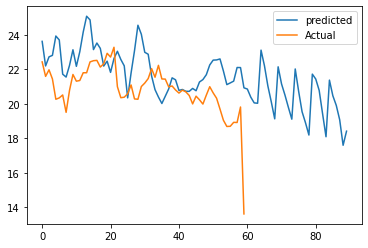

In [30]:
#This is a plt for the first 90 days of predictions for the first stock
plt.plot(predictions, label = 'predicted')
plt.plot(actuals, label = 'Actual')
plt.legend()
plt.show()

In [31]:
stock_predictions = []
stock_actuals = []

for i in range(60,df_close.shape[0], 30):
  pred, act = predict_prices(raw_df, df_close, i, 30, 30, 5)
  stock_predictions.append(pred)
  stock_actuals.append(act)

In [32]:
stock_predictions = np.concatenate(stock_predictions)
stock_actuals = np.concatenate(stock_actuals)

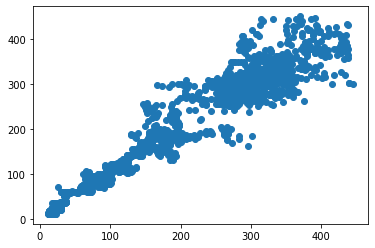

In [33]:
# Q-Q plot for predictions vs actuals
plt.scatter(x = stock_predictions[:2455], y = stock_actuals)

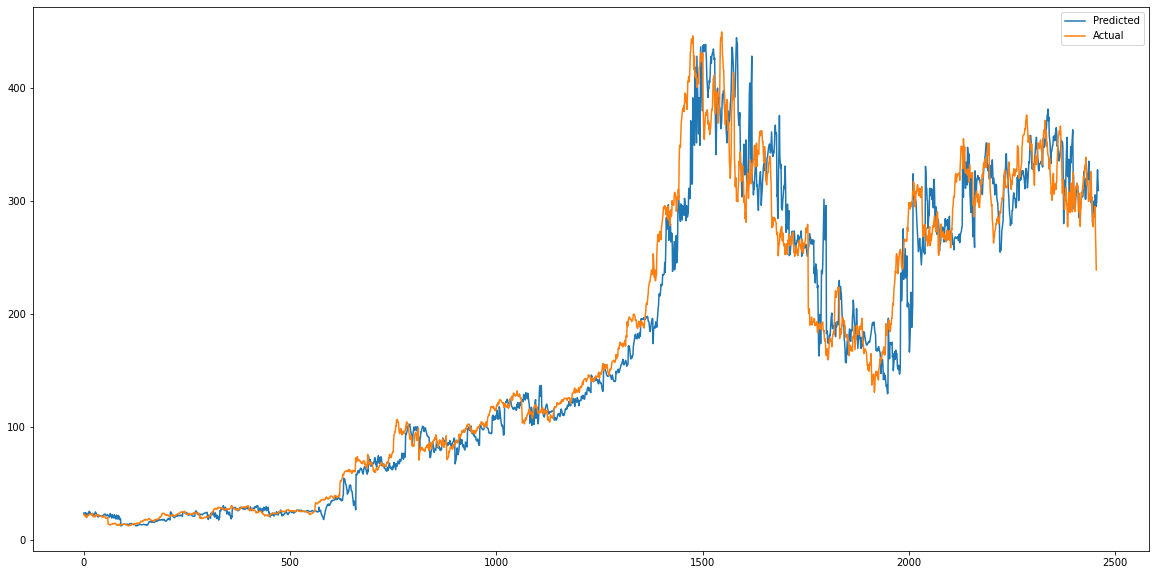

In [34]:
#Full Prediction vs Actuals for the same stock
plt.figure(figsize=(20,10))
plt.plot(stock_predictions, label = 'Predicted')
plt.plot(stock_actuals, label = 'Actual')
plt.legend()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mean_absolute_error(final_actuals, final_preds)

7.6498168222808385